## 將字詞向量化

In [1]:
s = '柯文哲為了大巨蛋一事槓上遠雄'

In [4]:
import jieba
jieba.load_userdict('userdict.txt')
for w in jieba.cut(s):
    print(w)

柯文哲
為
了
大巨蛋
一事
槓上
遠雄


In [5]:
content = ["How to format my hard disk", " Hard disk format problems "]
content

['How to format my hard disk', ' Hard disk format problems ']

In [9]:
a = content[0].lower().split()
b = content[1].lower().split()

In [10]:
a

['how', 'to', 'format', 'my', 'hard', 'disk']

In [11]:
b

['hard', 'disk', 'format', 'problems']

In [13]:
words_set = set(a) | set(b)
words_set

{'disk', 'format', 'hard', 'how', 'my', 'problems', 'to'}

In [16]:
word_to_id = {}
id_to_word = {}
for i in enumerate(words_set):
    #print(i)
    word_to_id[i[1]] = i[0]
    id_to_word[i[0]] = i[1]

In [18]:
word_to_id

{'how': 0, 'hard': 1, 'disk': 2, 'problems': 3, 'format': 4, 'to': 5, 'my': 6}

In [19]:
id_to_word

{0: 'how', 1: 'hard', 2: 'disk', 3: 'problems', 4: 'format', 5: 'to', 6: 'my'}

In [21]:
a_ary = [word_to_id.get(w) for w in a]
b_ary = [word_to_id.get(w) for w in b]

In [23]:
a_ary

[0, 5, 4, 6, 1, 2]

In [25]:
b_ary

[1, 2, 4, 3]

In [27]:
import numpy as np
m = np.zeros((2,7))

In [28]:
for e in a_ary:
    m[0,e] = 1
for e in b_ary:
    m[1,e] = 1

In [29]:
m

array([[1., 1., 1., 0., 1., 1., 1.],
       [0., 1., 1., 1., 1., 0., 0.]])

In [33]:
import math
math.sqrt(((m[0] - m[1])**2).sum())

2.0

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

In [35]:
X

<2x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [37]:
print(vectorizer.get_feature_names())

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']


In [36]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

## 計算文字對文字的距離

In [38]:
posts = [
'This is a toy post about machine learning. Actually, it contains not much interesting stuff.',
'Imaging databases provide storage capabilities.' ,
'Most imaging databases safe images permanently.',
'Imaging databases store data.',
'Imaging databases store data. Imaging databases store data. Imaging databases store data.',
]

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(posts)

In [40]:
print(vectorizer.get_feature_names())

['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'this', 'toy']


In [41]:
X

<5x25 sparse matrix of type '<class 'numpy.int64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [43]:
#X.toarray()

In [46]:
query = 'Imaging database'

In [48]:
Y = vectorizer.transform([query])

In [49]:
Y

<1x25 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [52]:
(Y - X[0]).toarray()

array([[-1, -1,  0, -1,  0,  0,  0,  1, -1, -1, -1, -1, -1,  0, -1, -1,
         0, -1,  0,  0,  0,  0, -1, -1, -1]], dtype=int64)

## 使用Euclidean Distance 計算距離

In [61]:
import scipy as sp

def euclidean_dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta)

In [55]:
?sp.linalg.norm

In [58]:
sp.linalg.norm(np.array([-1,1,-1,1]))

2.0

In [62]:
for i in range(5):
    print(posts[i], euclidean_dist_raw(X[i].toarray(), Y.toarray()))

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 3.872983346207417
Imaging databases provide storage capabilities. 2.0
Most imaging databases safe images permanently. 2.23606797749979
Imaging databases store data. 1.7320508075688772
Imaging databases store data. Imaging databases store data. Imaging databases store data. 5.5677643628300215


In [63]:
sp.linalg.norm(np.array([1,1,1,1]))

2.0

In [64]:
sp.linalg.norm(np.array([0,0,1,1]))

1.4142135623730951

In [65]:
sp.linalg.norm(np.array([1,1,1,1,1,1,1,1,1,1,1,1]))

3.4641016151377544

## 將每個詞向量先做正規化後再計算距離

In [70]:
def dist(v1, v2):
    v1_normalized  = v1 / sp.linalg.norm(v1) 
    v2_normalized  = v2 / sp.linalg.norm(v2)
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta)

In [71]:
for i in range(5):
    print(posts[i], dist(X[i].toarray(), Y.toarray()))

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.4142135623730951
Imaging databases provide storage capabilities. 1.0514622242382672
Most imaging databases safe images permanently. 1.0878894332937856
Imaging databases store data. 1.0
Imaging databases store data. Imaging databases store data. Imaging databases store data. 1.0


## 移除停用詞

In [72]:
print(vectorizer.get_feature_names())

['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'this', 'toy']


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
?CountVectorizer

In [74]:

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(posts)

In [75]:
print(vectorizer.get_feature_names())

['actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'learning', 'machine', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'toy']


In [77]:
X

<5x18 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [79]:
Y = vectorizer.transform([query])

In [80]:
for i in range(5):
    print(posts[i], dist(X[i].toarray(), Y.toarray()))

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases provide storage capabilities. 1.0514622242382672
Most imaging databases safe images permanently. 1.0514622242382672
Imaging databases store data. 1.0
Imaging databases store data. Imaging databases store data. Imaging databases store data. 1.0


## Stemming

In [81]:
import nltk.stem
s = nltk.stem.SnowballStemmer('english')

In [82]:
s.stem('graphics')

'graphic'

In [83]:
print(s.stem("imaging"))
print(s.stem("image"))

print(s.stem("imagination"))
print(s.stem("imagine"))

imag
imag
imagin
imagin


In [85]:
class Dog():
    def eat(self):
        print('i am eating')
        
class Cat():
    def eat(self):
        print('i am eating')
        
a = Dog()
a.eat()

i am eating


In [86]:
b = Cat()
b.eat()

i am eating


In [89]:
class Animal():
    def eat(self):
        print('i am eating')
    def walk(self):
        print('i am walking')
        
class Dog(Animal):
    def play(self):
        print('i am playing')
        
class Cat(Animal):
    def sleep(self):
        print('i am sleeping')

a = Dog()
a.eat()
a.play()
a.sleep()

i am eating
i am playing


AttributeError: 'Dog' object has no attribute 'sleep'

In [92]:

import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [93]:
vectorizer = StemmedCountVectorizer(stop_words='english')
X = vectorizer.fit_transform(posts)
Y = vectorizer.transform([query])

In [96]:
print(vectorizer.get_feature_names())

['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'safe', 'storag', 'store', 'stuff', 'toy']


In [94]:
for i in range(5):
    print(posts[i], dist(X[i].toarray(), Y.toarray()))

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases provide storage capabilities. 0.8573732768944039
Most imaging databases safe images permanently. 0.6296288974669553
Imaging databases store data. 0.7653668647301795
Imaging databases store data. Imaging databases store data. Imaging databases store data. 0.7653668647301795


## TFIDF 詞頻矩陣

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(posts)
Y = vectorizer.transform([query])

In [102]:
X

<5x25 sparse matrix of type '<class 'numpy.float64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [103]:
X.toarray()

array([[0.26726124, 0.26726124, 0.        , 0.26726124, 0.        ,
        0.        , 0.        , 0.        , 0.26726124, 0.26726124,
        0.26726124, 0.26726124, 0.26726124, 0.        , 0.26726124,
        0.26726124, 0.        , 0.26726124, 0.        , 0.        ,
        0.        , 0.        , 0.26726124, 0.26726124, 0.26726124],
       [0.        , 0.        , 0.52451722, 0.        , 0.        ,
        0.29550385, 0.        , 0.29550385, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.52451722, 0.        ,
        0.52451722, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26169047, 0.46449871, 0.26169047, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.46449871, 0.        ,
        0.        , 0.46449871, 0.        , 0.        , 0.46449871,
        0.        , 0.        , 0.        , 0.

In [104]:

import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedTfidfVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = StemmedTfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(posts)
Y = vectorizer.transform([query])

In [106]:
for i in range(5):
    print(posts[i], dist(X[i].toarray(), Y.toarray()))

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases provide storage capabilities. 0.8573732768944039
Most imaging databases safe images permanently. 0.6296288974669553
Imaging databases store data. 0.7653668647301795
Imaging databases store data. Imaging databases store data. Imaging databases store data. 0.7653668647301795


## 中文詞頻矩陣

In [107]:
a = ['柯文哲為了大巨蛋一事找趙藤雄算帳', '柯P將不在大巨蛋舉辦世運會']

In [118]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
for w in a:
    corpus.append(' '.join(jieba.cut(w)))

In [119]:
corpus

['柯文哲 為 了 大巨蛋 一事 找 趙藤雄 算帳', '柯P 將 不 在 大巨蛋 舉辦 世運會']

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [121]:
print(vectorizer.get_feature_names())

['一事', '世運會', '大巨蛋', '柯p', '柯文哲', '算帳', '舉辦', '趙藤雄']


In [122]:
from sklearn.metrics.pairwise import cosine_distances
cosine_distances(X)

array([[0.       , 0.7763932],
       [0.7763932, 0.       ]])

In [123]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X)

array([[1.       , 0.2236068],
       [0.2236068, 1.       ]])

## 同義詞爬蟲

In [133]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://zh.wikipedia.org/wiki/%E6%9F%AF%E6%96%87%E5%93%B2')
soup = BeautifulSoup(res.text, 'lxml')
synonym = '/'.join([b.text for b in soup.select('.mw-parser-output p')[6].select('b')])

In [134]:
with open('synonym.txt' , 'w') as f:
    f.write(synonym)

## 建立同義詞詞頻矩陣

In [135]:
with open('synonym.txt' , 'r') as f:
    data = f.read()

In [148]:
words = data.split('/')
synonym_dic = {}
for w in words[1:]:
    synonym_dic[w.lower()] = words[0]
synonym_dic

{'柯p': '柯文哲', 'kp': '柯文哲'}

In [149]:
class SynonymCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(SynonymCountVectorizer, self).build_analyzer()
        return lambda doc: (synonym_dic.get(w, w) for w in analyzer(doc))

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = SynonymCountVectorizer()
X = vectorizer.fit_transform(corpus)

In [151]:
print(vectorizer.get_feature_names())

['一事', '世運會', '大巨蛋', '柯文哲', '算帳', '舉辦', '趙藤雄']


In [152]:
from sklearn.metrics.pairwise import cosine_distances
cosine_distances(X)

array([[0.       , 0.5527864],
       [0.5527864, 0.       ]])

## 加入停用詞

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = SynonymCountVectorizer(stop_words=['一事'])
X = vectorizer.fit_transform(corpus)

In [154]:
from sklearn.metrics.pairwise import cosine_distances
cosine_distances(X)

array([[0. , 0.5],
       [0.5, 0. ]])

## 電信業客戶流失分析

In [155]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv', index_col=0)


In [157]:
df = df.iloc[:,3:]

In [161]:
object_columns = list(df.select_dtypes('object').columns)
for c in object_columns:
    df[c]  = df[c].replace({'yes':1, 'no':0})

In [165]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [180]:
churn_0 = df[df["churn"]==0]
churn_1 = df[df["churn"]==1]
subset_of_churn_0 = churn_0.sample(n=400)
subset_of_churn_1 = churn_1.sample(n=400)
data_clean = pandas.concat([subset_of_churn_0, subset_of_churn_1])
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean.shape)
data_clean.head()

Current shape of dataset : (800, 17)


,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,175.7,120,29.87,168.6,90,14.33,198.9,110,8.95,14.6,4,3.94,1,0
1,0,1,33,143.0,101,24.31,212.2,102,18.04,104.9,120,4.72,15.3,4,4.13,5,1
2,1,0,0,47.7,89,8.11,264.4,95,22.47,235.2,97,10.58,13.2,3,3.56,0,1
3,1,0,0,146.3,117,24.87,218.7,93,18.59,236.0,97,10.62,11.5,5,3.11,1,0
4,1,0,0,165.4,107,28.12,196.0,126,16.66,349.2,110,15.71,9.6,7,2.59,2,0


Populating the interactive namespace from numpy and matplotlib


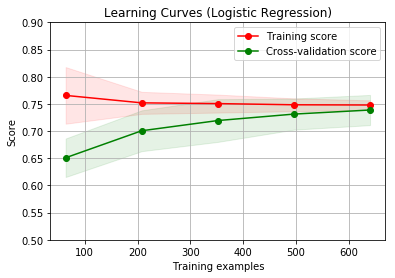

In [181]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values

title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 0.90), cv=cv, n_jobs=4)
plt.show()

## 爬取蘋果新聞

In [192]:
def parseArticle(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml' )
    title = soup.select_one('h1').text
    content = soup.select_one('.ndArticle_margin p').text
    return {'title':title, 'content': content}

In [195]:
parseArticle('https://tw.news.appledaily.com/life/realtime/20190720/1603155/')

{'title': '休旅車變身毛小孩旅館\u3000猴硐「貓咪守護神」有你真好',
 'content': '新北市瑞芳區猴硐「貓村」遠近馳名，曾獲CNN推薦為全球六大賞貓景點，其實當地貓群在地逐漸聚集已有九年，在民間貓友社及其他志工團體自動自發照顧下，如排班餵食、訂製小木屋、協助結紮送醫等，讓毛小孩們獲得安居溫飽，被譽為「貓咪守護神」，甚至還有人熱心捐出休旅車，後車箱門永遠敞開，以當作貓咪的汽車旅館，為濕冷山區帶來一處溫暖。\xa0猴硐地名的由來，早期是因北37鄉道猴牡公路4.7k附近棲息大量台灣獼猴，後來經人類開採煤炭，導致猴群漸漸搬遷消失，2010年開始，漸漸有貓咪聚集於此地，形成一個大群落，當時民間團體貓友社及其他志工團體自發性的開始照顧貓咪，新北市政府動保處於2012年加入協助志工，雙方通力合作，漸漸讓猴硐貓村聲名遠播，更於2013年入選CNN推薦世界六大賞貓點之一。\xa02014年11月，觀光局翻修臺鐵員工宿舍，變身成為猴硐貓咪衛教宣導資訊站，該資訊站不僅提供貓咪衛教宣導、通報轉介醫療、暫時收容及中途服務，也每月定期環境消毒、配合獸醫、志工協助注射狂犬病、貓三合一疫苗來預防各類貓咪疾病。\xa0而其中愛貓志工Jenny所帶領的貓友社，在貓村扮演非常重要角色，在物質、金錢、人力、時間上無怨無悔的付出，對貓咪的照顧更無微不至。\xa0眾人除了每天排班巡迴餵食外，貓友社志工們擔心錯過放飯時間的貓咪餓肚子，貼心設置定點供食箱隨時補充飼料，又怕貓咪日曬雨淋，更訂製專屬小木屋、升級版混合供吃住兩用套房式複合屋，把牠們照顧得無微不至。同時持續協助進行捕捉、結紮、送養或原放、將病貓送動物醫院檢查等流程，可說是猴硐「貓咪的守護神」。\xa0另外，在猴硐第三停車場長期停放著一台九人座休旅車長，後車廂半開，是人稱「甜甜號街貓汽車旅館」，是個貓咪在天冷或雨天，便會進去避寒的地方。\xa0動保處指出，「甜甜號街貓汽車旅館」源起於2016年1月23日北部氣象異常下起冰霰、霸王寒流侵襲，一位人稱「美國姨」的貓友社志工，因為愛貓且長期照顧當地貓咪，對貓咪們已產生了極深的感情，就怕貓咪受苦受凍而特別捐贈。至今，甜甜號汽車旅館仍風雨無阻地在停車場中服務，為這個濕冷的山區帶來溫暖。\xa0農業局長李玟表示，猴硐貓村是新北市動保資產，吸引中外遊客參訪學習，但貓兒族群密度增加，造成動物群體間

In [ ]:
import requests
from bs4 import BeautifulSoup
news = []
for i in range(1, 55):
    res = requests.get(f'https://tw.appledaily.com/new/realtime/{i}')
    soup = BeautifulSoup(res.text, 'lxml' )
    for alink in soup.select('.rtddt a'):
        news.append(parseArticle(alink.get('href')))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
